<a href="https://colab.research.google.com/github/nathanielborland/2024Fall-MOCS/blob/main/Assignment2CellularAutomata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment #2**
Carina Manitius, Trevor Webster, Derek Devine, Nate Borland

# City Growth

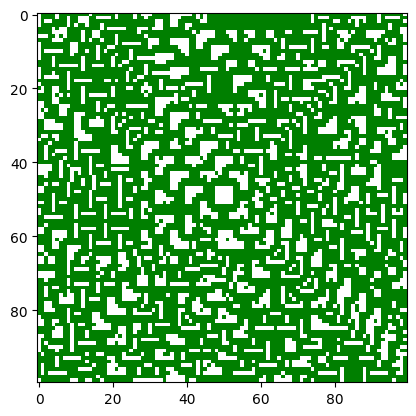

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 1., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from IPython import display
import time

# length of one side of the world grid. world will be a (world_size x world_size) 2D array.
size = 100 # @param {type:"slider", min:0, mak:111, step:1}

# default chance for green space to turn into urban space for a certain number of urban neighbors
default_chance_0 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_1 = .9 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_2 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_3 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_4 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_5 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_6 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_7 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_8 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_9 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_10 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_11 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_12 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_13 = 0 # @param {type:"slider", min:0, max:1, step:0.001}
default_chance_14 = 0 # @param {type:"slider", min:0, max:1, step:0.001}

# list of default urbanization chances
default_chances = [default_chance_0, default_chance_1, default_chance_2,
                   default_chance_3, default_chance_4, default_chance_5,
                   default_chance_6, default_chance_7, default_chance_8,
                   default_chance_9, default_chance_10, default_chance_11,
                   default_chance_12, default_chance_13, default_chance_14]

# radius of the extended moore neighborhood considered for each cell update
# compute used increases drastically as this increases
r = 2 # @param {type:"slider", min:1, max:3, step:1}

max_unchanged_updates = 2 # @param {type:"slider", min:1, max:10, step:1}

# toggles display of intermediate steps, disabling will skip to the end state and is much faster
animate_growth = False # @param {type:"boolean"}

# forced sleep on every update, for slowing down animations for very fast rule sets
forced_sleep = 0 # @param {type:"slider", min:0, max:1, step:0.1}

# displays the current state of world cells
def display_world(world):
    if not animate_growth:
        # Create a new figure for each plot to avoid reusing previous plots
        plt.figure()
    plt.imshow(np.flipud(world), cmap=plt.get_cmap(cm.ocean))
    if not animate_growth:
        plt.show()
    else:
        display.display(plt.gcf())
        display.clear_output(wait=True)

# gets the square neighborhood within radius of the cell at i,j in world
# treats cells with i or j less than 0 or greater than world_size - 1 as 0
def get_neighborhood(world, i, j):
    # WIP better rules that treat indices outside the world as 0, not working
    neighborhood = np.zeros(((r*2)+1,(r*2)+1))
    for k in range(i-r, i+r+1):
        for l in range(j-r, j+r+1):
            if not (k < 0 or l < 0 or k > size-1 or l > size-1):
                neighborhood[k-(i-r)][l-(j-r)] = world[k][l]
    return neighborhood

## Explicit zoning rules for each neighbor count
def get_next_state(neighborhood):
    chance = default_chances[min(len(default_chances)-1, np.count_nonzero(neighborhood))]
    if chance > 0 and np.random.rand() < chance:
        return 1
    else:
        return 0

# checks each cell in world and applies the results of get_next_state
def update_world(world):
    next_world = world.copy()
    for i in range(size):
        for j in range(size):
            # urban space cannot turn into green space in this model so we can skip it
            if world[i][j] == 1:
                continue
            next_world[i][j] = get_next_state(get_neighborhood(world, i, j))
    return next_world


#set default_chances globally
def run_model(display= True):
# set up 'world', a (size x size) 2D array of all zeros (green space)
    world = np.zeros((size,size))
    # set up a single 1 (urban space) in the center
    world[size//2,size//2] = 1

    # set up completion conditions
    finished = False
    force_sleep = forced_sleep > 0
    num_unchanged_updates = 0

# main update loop
    while not finished:
        # display current world state
        if animate_growth:
            display_world(world)
            if force_sleep:
                time.sleep(forced_sleep)
        # compute next world state
        next_world = update_world(world)
        # check if world changed in the last update
        if np.array_equal(world, next_world):
            num_unchanged_updates += 1
        else:
            num_unchanged_updates = 0
        # check if world is sufficiently settled
        if num_unchanged_updates > max_unchanged_updates:
            finished = True
        # update world state
        world = next_world

    # display final state of the world
    if display: 
        display_world(world)
    return world

run_model()

## Optimum ratio model

In [171]:
def run_optimum_ratios_model(default_chances, world_size):
        # radius of the neighborhood considered for each cell update
    # compute used increases drastically as this increases
    neighborhood_radius = 2 # param {type:"slider", min:0, max:5, step:1}

    # toggles use of the special_rule_dict, disabling will default to basic neighbor count rules
    use_special_rules = False # @param {type:"boolean"}

    # toggles display of intermediate steps, disabling will skip to the end state and is much faster
    animate_growth = True # @param {type:"boolean"}

    # forced sleep on every update, for slowing down animations for very fast rule sets
    forced_sleep = 0 # param {type:"slider", min:0, max:1, step:0.1}

    # r_growth_rate = 1 # @param {type:"slider", min:0, max:1, step:0.01}
    # K = 9 - 1

    # displays the current state of world cells
    def display_world(world):
        plt.imshow(np.flipud(world), cmap=plt.get_cmap(cm.ocean))
        display.display(plt.gcf())
        display.clear_output(wait=True)

    # gets the square neighborhood within radius of the cell at i,j in world
    # treats cells with i or j less than 0 or greater than world_size - 1 as 0
    def get_neighborhood(world, i, j):
        # WIP better rules that treat indices outside the world as 0, not working
        neighborhood = np.zeros(((neighborhood_radius*2)+1,(neighborhood_radius*2)+1))
        for k in range(i-neighborhood_radius, i+neighborhood_radius+1):
            for l in range(j-neighborhood_radius, j+neighborhood_radius+1):
                if not (k < 0 or l < 0 or k > world_size-1 or l > world_size-1):
                    neighborhood[k-(i-neighborhood_radius)][l-(j-neighborhood_radius)] = world[k][l]
        return neighborhood

    # def logistic_rule(neighbor_count):
    #     return np.random.rand() < r_growth_rate * (1 - (neighbor_count/K))

    # helper function to get a rule number for a given neighborhood
    def get_rule_num(neighborhood):
        rule_num = 0
        if neighborhood[neighborhood_radius-1,neighborhood_radius-1] == 1:
            rule_num = rule_num | 1 << 0
        if neighborhood[neighborhood_radius-1,neighborhood_radius] == 1:
            rule_num = rule_num | 1 << 1
        if neighborhood[neighborhood_radius-1,neighborhood_radius+1] == 1:
            rule_num = rule_num | 1 << 2
        if neighborhood[neighborhood_radius,neighborhood_radius-1] == 1:
            rule_num = rule_num | 1 << 3
        if neighborhood[neighborhood_radius,neighborhood_radius+1] == 1:
            rule_num = rule_num | 1 << 4
        if neighborhood[neighborhood_radius+1,neighborhood_radius-1] == 1:
            rule_num = rule_num | 1 << 5
        if neighborhood[neighborhood_radius+1,neighborhood_radius] == 1:
            rule_num = rule_num | 1 << 6
        if neighborhood[neighborhood_radius+1,neighborhood_radius+1] == 1:
            rule_num = rule_num | 1 << 7
        if neighborhood[neighborhood_radius,neighborhood_radius] == 0:
            rule_num *= -1
        return rule_num

    ## Explicit zoning rules for each neighbor count
    def get_next_state(neighborhood):
        rule_num = get_rule_num(neighborhood)
        default_chance = default_chances[min(len(default_chances)-1, np.count_nonzero(neighborhood))]

        # tweak as needed to modify how priority works between default and special rules
        # this should only be relevant for neighborhoods with radius > 1
        if use_special_rules and rule_num in special_rule_dict:
            chance = special_rule_dict[rule_num]
        else:
            chance = default_chance

        if chance > 0 and np.random.rand() < chance:
            return 1
        else:
            return 0

    # checks each cell in world and applies the results of get_next_state
    def update_world(world):
        next_world = world.copy()
        reached_edge = False
        for i in range(world_size):
            for j in range(world_size):
                # this saves compute but must be removed if we want city to be able to turn to forest
                if world[i][j] == 1:
                    continue
                next_state = get_next_state(get_neighborhood(world, i, j))
                next_world[i][j] = next_state
                if next_state == 1 and (i == 0 or j == 0 or i == world_size-1 or j == world_size-1):
                    reached_edge = True

        return (next_world, reached_edge)

    # set up 'world', a (size x size) 2D array of all zeros (greenspace) with a 1 (concrete) in the center
    world = np.zeros((world_size,world_size))
    world[world_size//2,world_size//2] = 1

    # set up completion conditions
    finished = False
    reached_edge = False
    num_unchanged_updates = 0
    max_unchanged_updates = 10

    # main update loop
    while not finished:
        if animate_growth:
            display_world(world)
            # uncomment to slow down very fast rulesets
            # time.sleep(0.1)

        (next_world, touched_edge) = update_world(world)

        if np.array_equal(world, next_world):
            num_unchanged_updates += 1
        else:
            num_unchanged_updates = 0

        # tweaks to completion conditions go here
        if touched_edge:
            reached_edge = True
        if reached_edge and num_unchanged_updates > max_unchanged_updates:
            finished = True
        world = next_world

    # display final state of the world
    display_world(world)
    return world

Fractal D -1.891998445468375
Greenspace 0.5492
Largest building cluster 73
Largest green cluster 1153
entropy 0.6882980574793913
chi2_statistic, p_value (96.8256, 7.571083745800152e-23)


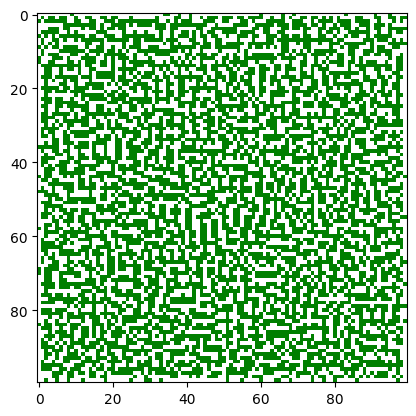

In [173]:
        
#I'll write up how I got these later
default_chances = [
    .113752181, .335453103, .1677266052, .111538194, .074706127, .0596268081, .0496965545, .0479211684, .0419316513,
    0, 0, 0, 0, 0, 0
]
optimum_ratios_ca_grid = run_optimum_ratios_model(default_chances, 100)
print(f"Fractal D {get_fractal_dimension(optimum_ratios_ca_grid)}") 
print(f"Greenspace {share_greenspace(optimum_ratios_ca_grid)}")
print(f"Largest building cluster {largest_cluster(optimum_ratios_ca_grid, 1)}") 
print(f"Largest green cluster {largest_cluster(optimum_ratios_ca_grid, 0)}")
chi2_statistic, p_value = test_uniformity_chi_square(optimum_ratios_ca_grid)
print(f"entropy {calculate_entropy(optimum_ratios_ca_grid)}") 
print(f"chi2_statistic, p_value {test_uniformity_chi_square(optimum_ratios_ca_grid)}")


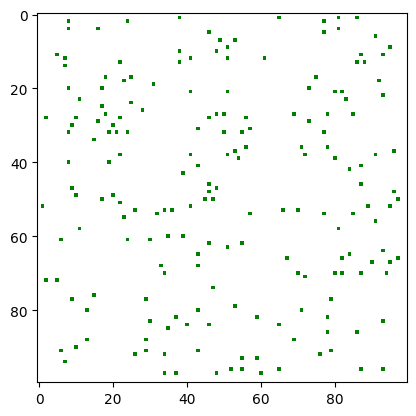

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [22]:
default_chances = [p for k, p in [
    (0, 0.00390625), (1, 0.03125), (2, 0.109375), 
    (3, 0.21875), (4, 0.2734375), (5, 0.21875), 
    (6, 0.109375), (7, 0.03125), (8, 0.00390625)
]]
run_model()

## Box count

In [4]:
import numpy as np
from scipy.stats import linregress

def divide_into_boxes(arr, r):
    # Get the size of the original array
    n = arr.shape[0]
    arr = np.array(arr)
    if n % r != 0:
        raise ValueError("The size of the array must be divisible by the block size.")

    # Reshape and swap axes to divide the array into r x r boxes
    boxes = arr.reshape(n // r, r, n // r, r).swapaxes(1, 2)
    return boxes

# Counts number of boxes of size r to cover the structure 
def box_count(arr, r):
    N = 0
    boxes = divide_into_boxes(arr, r)
    for i in range(boxes.shape[0]):
        for j in range(boxes.shape[1]):
            # print(f"Box ({i}, {j}):")
            # print(boxes[i, j])
            # print()
            if np.any(boxes[i,j]==1):
                N += 1
      
        
    return N

# Counts boxes to cover structure for all r divisors
def box_count_all_r(world):
    res = []
    arr = world
    n = world.shape[0]
    divisors = [r for r in range(1, n+1) if n % r == 0]
    for r in divisors:
        N = box_count(arr,r)
        res.append((r, N ))

    return res

def get_fractal_dimension(world):
    box_count_res = box_count_all_r(world)
    # Extract x and y values
    x_values = np.array([x for x, y in box_count_res])
    y_values = np.array([y for x, y in box_count_res])

    # Apply log transformation to both x and y
    log_x = np.log10(x_values)
    log_y = np.log10(y_values)

    # Perform linear regression on the log-log transformed data
    slope, intercept, r_value, p_value, std_err = linregress(log_x, log_y)

    # Print the slope
    return slope
    # Example usage

# world = run_model()
box_count_all_r(world)
get_fractal_dimension(world)


NameError: name 'world' is not defined

## Get fractal dimension loop

In [ ]:
import itertools
import numpy as np
import pandas as pd


# Define the values and generate permutations of length 3
values = [0, 0.1, 1]
permutations = list(itertools.product(values, repeat=8))

# Convert permutations to a NumPy array
permutations = np.array(permutations)

# Define the two arrays to prepend
# prepend_options = np.array([[0, 1], [0, 0.5]])

# # Generate all combinations by prepending [0, 1] and [0, 0.1] to each permutation
# permutations = np.vstack([
#     np.hstack((np.tile(prepend, (permutations.shape[0], 1)), permutations))
#     for prepend in prepend_options
# ])



zeros_to_append = np.zeros((permutations.shape[0], 7))  # Create a (n, 4) array of zeros
permutations = np.hstack((permutations, zeros_to_append))

permutations


res = []

for p_chances in permutations:
    default_chances = p_chances
    
    world = run_model(display=False)
    # N = box_count_all_r(world)
    D = get_fractal_dimension(world)
    G =share_greenspace(world)
    S_urban = largest_cluster(world, 1)
    S_green = largest_cluster(world, 0)
    chi2_statistic, p_value = test_uniformity_chi_square(world)
    e = calculate_entropy(world)
    res.append((str(p_chances), D, G, S_urban, S_green, e, chi2_statistic, p_value, world))
    
# Create a DataFrame using all columns except 'world'
df = pd.DataFrame(res, columns=[
    "default_chances", "D", "Greenspace", "S urban cluster", 
    "S_green", "entropy", "chi2_statistic", "p_value", "world"
])

# Drop the 'world' column
df = df.drop(columns=["world"])
df.to_csv("0-8 neighbors centralized growth.csv")

### r = 1

default_chances: [0. 1. 0. 0. 0. 0. 0. 0. 0.], D: -1.8912361952970234 Greenspace 0.5486 S_urban_cluster 544


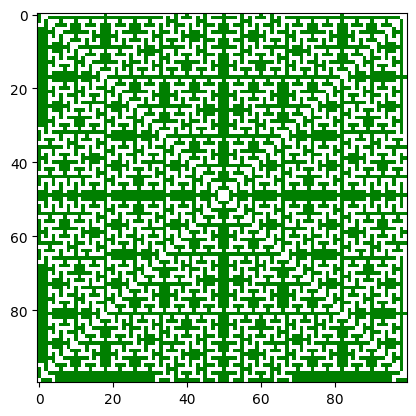

default_chances: [0.  1.  0.  0.  0.1 0.  0.  0.  0. ], D: -1.9328470641527982 Greenspace 0.4062 S_urban_cluster 5700


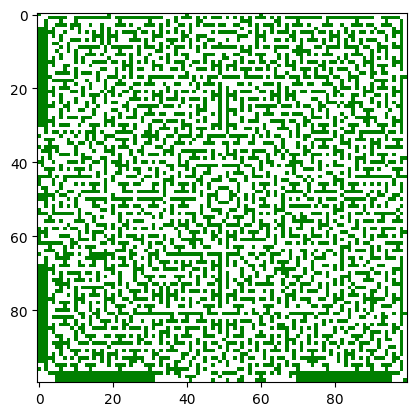

default_chances: [0. 1. 0. 0. 1. 0. 0. 0. 0.], D: -1.9570774426496265 Greenspace 0.271 S_urban_cluster 7281


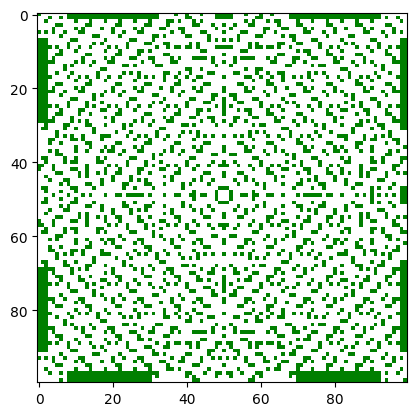

default_chances: [0.  1.  0.  0.1 0.  0.  0.  0.  0. ], D: -1.9294731898631994 Greenspace 0.4311 S_urban_cluster 5305


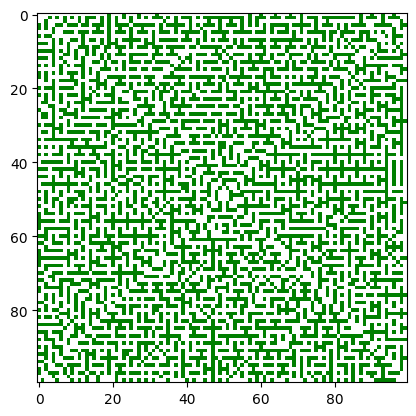

default_chances: [0.  1.  0.  0.1 0.1 0.  0.  0.  0. ], D: -1.9465662946345776 Greenspace 0.3479 S_urban_cluster 6501


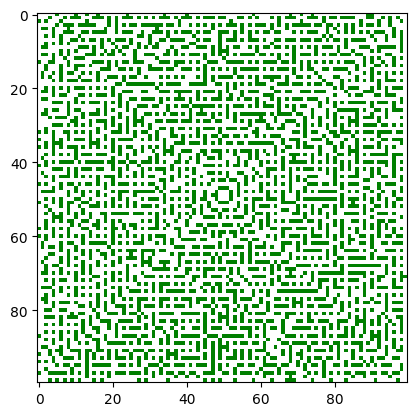

default_chances: [0.  1.  0.  0.1 1.  0.  0.  0.  0. ], D: -1.968045537194231 Greenspace 0.2254 S_urban_cluster 7737


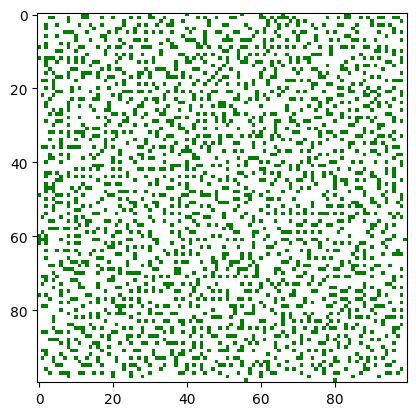

default_chances: [0. 1. 0. 1. 0. 0. 0. 0. 0.], D: -1.9405617002843047 Greenspace 0.3642 S_urban_cluster 3703


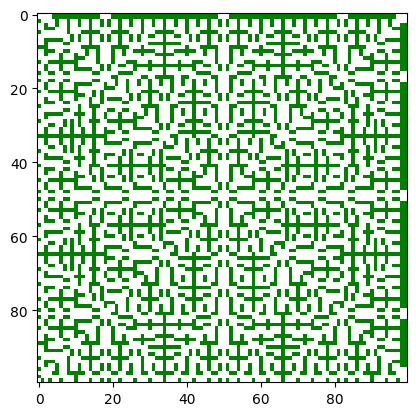

default_chances: [0.  1.  0.  1.  0.1 0.  0.  0.  0. ], D: -1.9594819576851772 Greenspace 0.2767 S_urban_cluster 7220


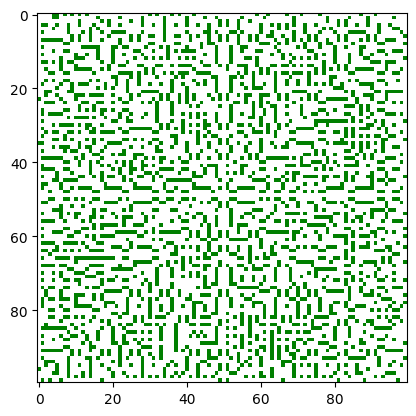

default_chances: [0. 1. 0. 1. 1. 0. 0. 0. 0.], D: -1.9779720242003322 Greenspace 0.1616 S_urban_cluster 8384


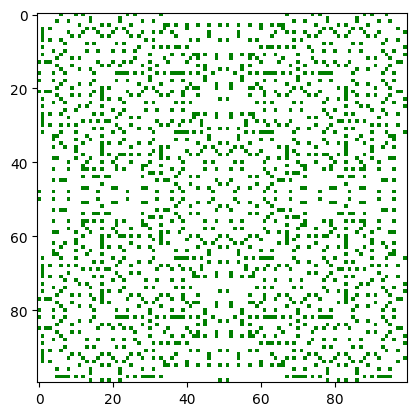

default_chances: [0.  1.  0.1 0.  0.  0.  0.  0.  0. ], D: -1.9270598152521803 Greenspace 0.4401 S_urban_cluster 564


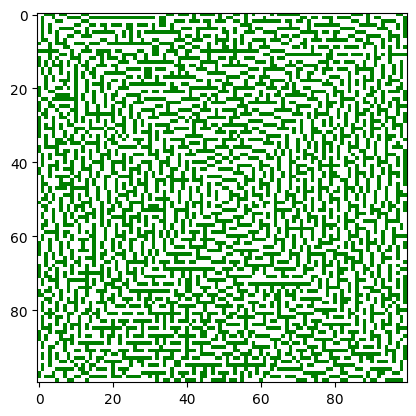

default_chances: [0.  1.  0.1 0.  0.1 0.  0.  0.  0. ], D: -1.9432891112611732 Greenspace 0.3646 S_urban_cluster 6268


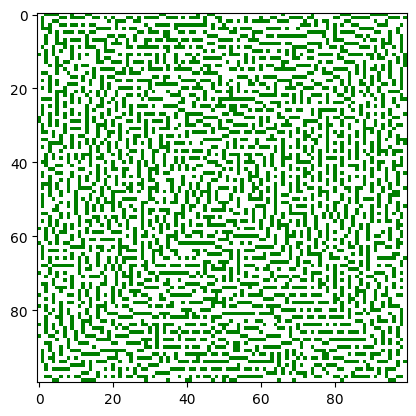

default_chances: [0.  1.  0.1 0.  1.  0.  0.  0.  0. ], D: -1.9666431727121596 Greenspace 0.2334 S_urban_cluster 7655


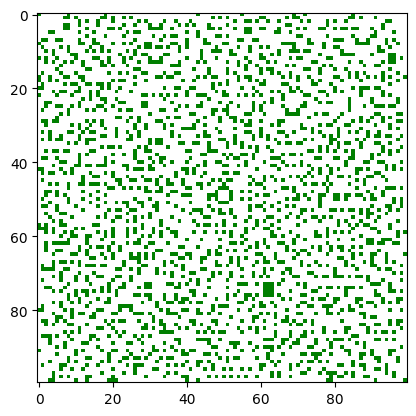

default_chances: [0.  1.  0.1 0.1 0.  0.  0.  0.  0. ], D: -1.9363472173346443 Greenspace 0.3991 S_urban_cluster 5122


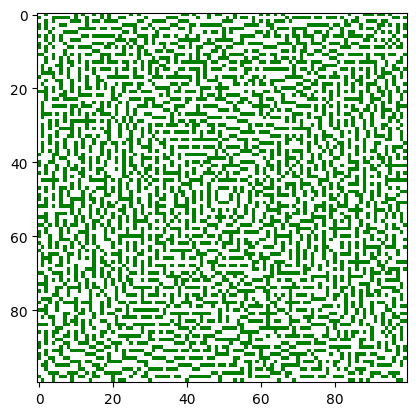

default_chances: [0.  1.  0.1 0.1 0.1 0.  0.  0.  0. ], D: -1.9472352726770974 Greenspace 0.3444 S_urban_cluster 6515


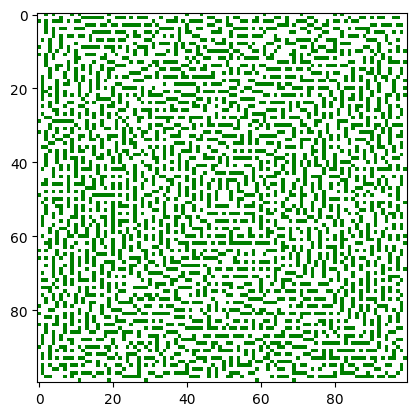

default_chances: [0.  1.  0.1 0.1 1.  0.  0.  0.  0. ], D: -1.968255104046025 Greenspace 0.2241 S_urban_cluster 7758


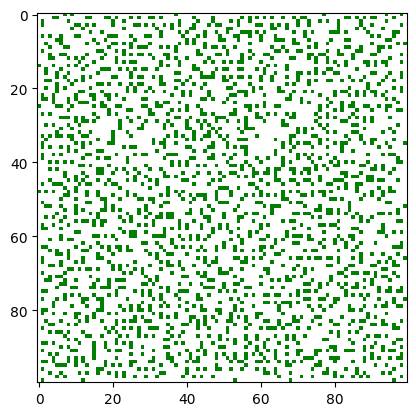

default_chances: [0.  1.  0.1 1.  0.  0.  0.  0.  0. ], D: -1.9650847664988322 Greenspace 0.2429 S_urban_cluster 7568


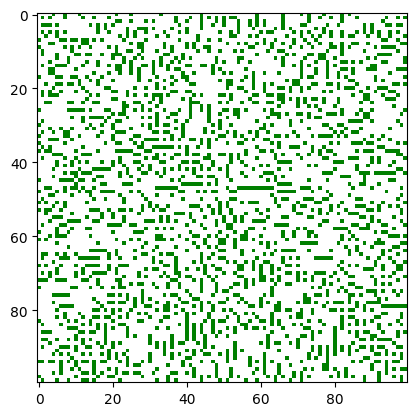

default_chances: [0.  1.  0.1 1.  0.1 0.  0.  0.  0. ], D: -1.968515347431009 Greenspace 0.2227 S_urban_cluster 7773


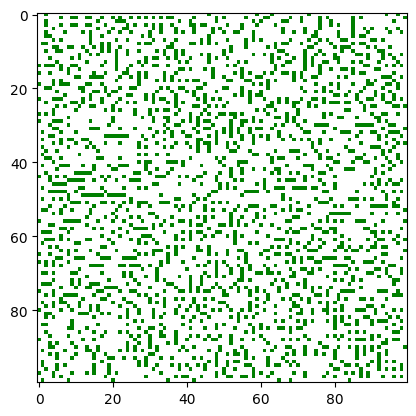

default_chances: [0.  1.  0.1 1.  1.  0.  0.  0.  0. ], D: -1.9835830787813387 Greenspace 0.1231 S_urban_cluster 8769


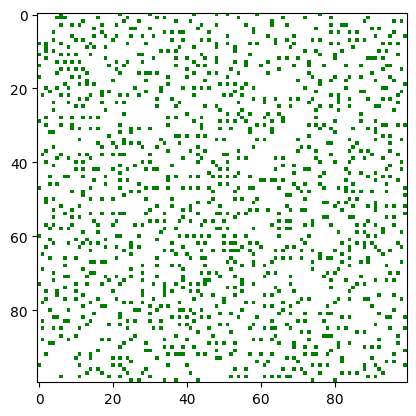

default_chances: [0. 1. 1. 0. 0. 0. 0. 0. 0.], D: -1.9576192300814248 Greenspace 0.2876 S_urban_cluster 7104


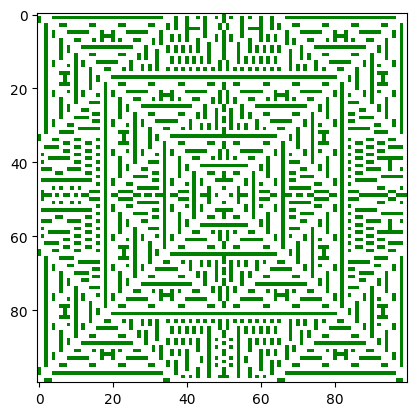

default_chances: [0.  1.  1.  0.  0.1 0.  0.  0.  0. ], D: -1.961487349372481 Greenspace 0.265 S_urban_cluster 7348


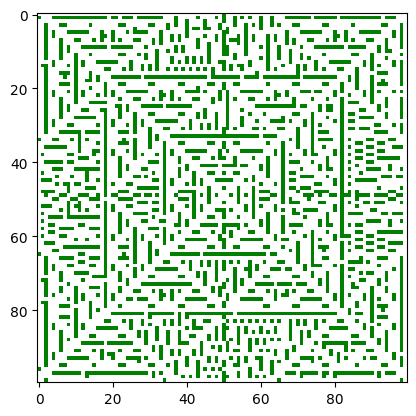

default_chances: [0. 1. 1. 0. 1. 0. 0. 0. 0.], D: -1.9858848013929664 Greenspace 0.1068 S_urban_cluster 8932


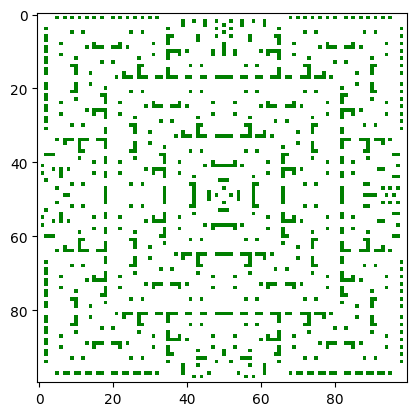

default_chances: [0.  1.  1.  0.1 0.  0.  0.  0.  0. ], D: -1.9593958989424713 Greenspace 0.2774 S_urban_cluster 7225


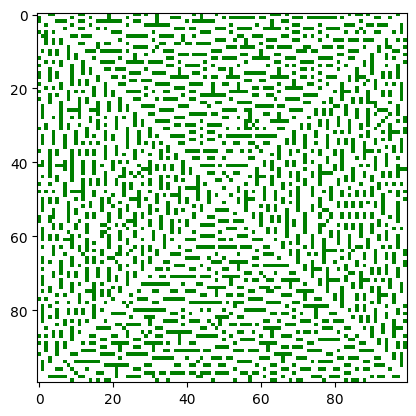

default_chances: [0.  1.  1.  0.1 0.1 0.  0.  0.  0. ], D: -1.9638636877733457 Greenspace 0.2511 S_urban_cluster 7487


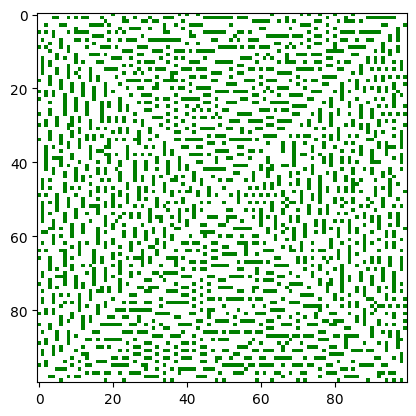

default_chances: [0.  1.  1.  0.1 1.  0.  0.  0.  0. ], D: -1.983867790959965 Greenspace 0.1211 S_urban_cluster 8789


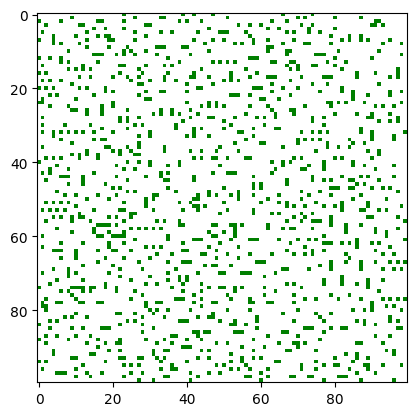

default_chances: [0. 1. 1. 1. 0. 0. 0. 0. 0.], D: -2.0 Greenspace 0.0 S_urban_cluster 10000


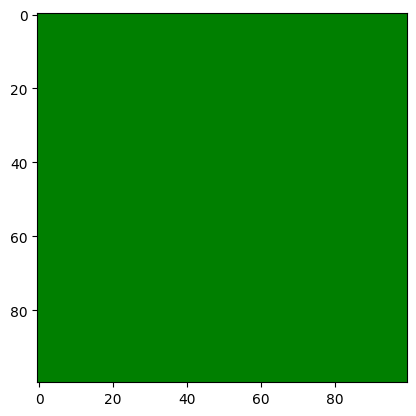

default_chances: [0.  1.  1.  1.  0.1 0.  0.  0.  0. ], D: -2.0 Greenspace 0.0 S_urban_cluster 10000


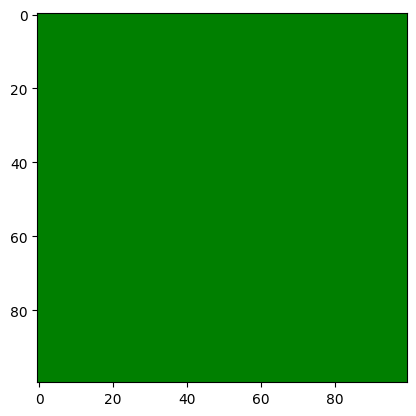

default_chances: [0. 1. 1. 1. 1. 0. 0. 0. 0.], D: -2.0 Greenspace 0.0 S_urban_cluster 10000


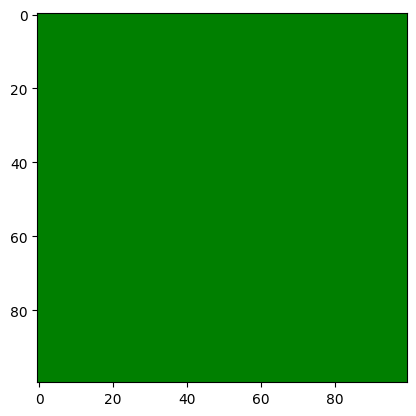

default_chances: [0.  0.5 0.  0.  0.  0.  0.  0.  0. ], D: -1.8946089279303253 Greenspace 0.557 S_urban_cluster 46


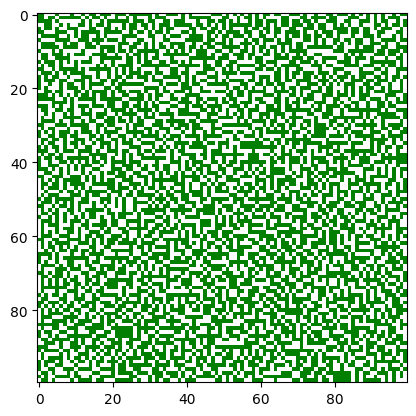

default_chances: [0.  0.5 0.  0.  0.1 0.  0.  0.  0. ], D: -1.9443821978528621 Greenspace 0.3583 S_urban_cluster 6309


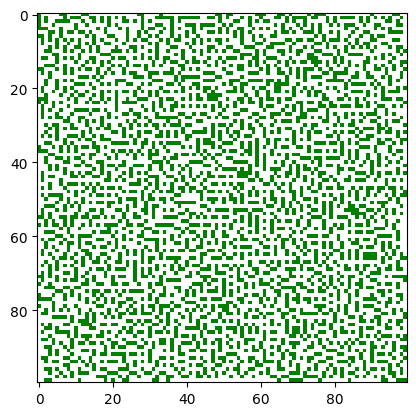

default_chances: [0.  0.5 0.  0.  1.  0.  0.  0.  0. ], D: -1.9660451241442678 Greenspace 0.2377 S_urban_cluster 7604


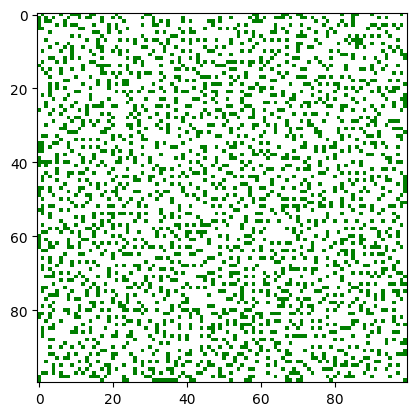

default_chances: [0.  0.5 0.  0.1 0.  0.  0.  0.  0. ], D: -1.9260063181326377 Greenspace 0.4462 S_urban_cluster 150


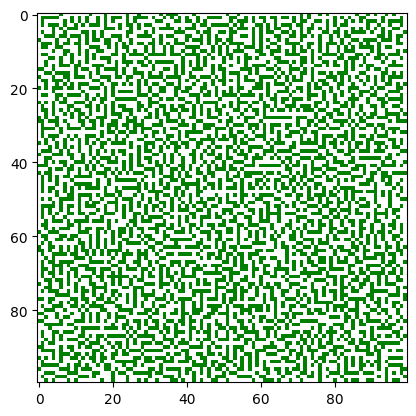

default_chances: [0.  0.5 0.  0.1 0.1 0.  0.  0.  0. ], D: -1.9447905673361483 Greenspace 0.3571 S_urban_cluster 6351


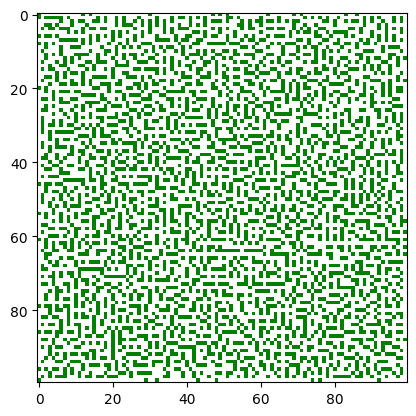

default_chances: [0.  0.5 0.  0.1 1.  0.  0.  0.  0. ], D: -1.9686278428410737 Greenspace 0.222 S_urban_cluster 7772


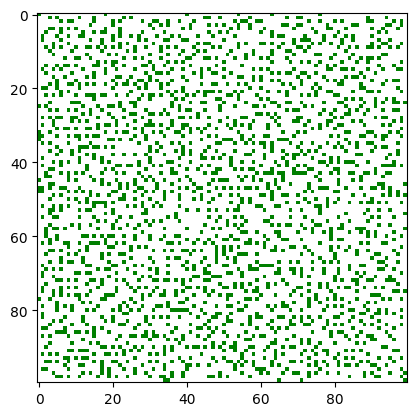

default_chances: [0.  0.5 0.  1.  0.  0.  0.  0.  0. ], D: -1.9591878798880722 Greenspace 0.2784 S_urban_cluster 7201


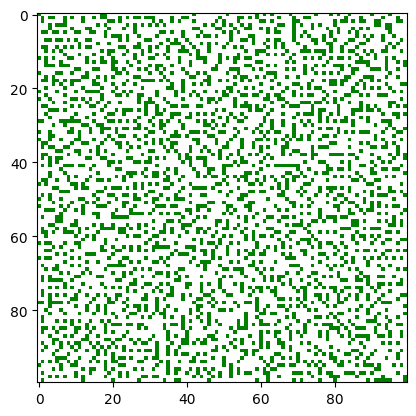

default_chances: [0.  0.5 0.  1.  0.1 0.  0.  0.  0. ], D: -1.9619794752505706 Greenspace 0.2621 S_urban_cluster 7364


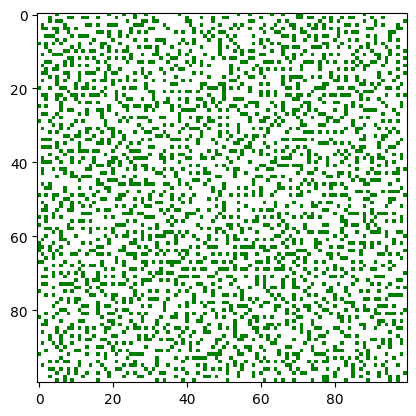

default_chances: [0.  0.5 0.  1.  1.  0.  0.  0.  0. ], D: -1.9841660423080516 Greenspace 0.119 S_urban_cluster 8810


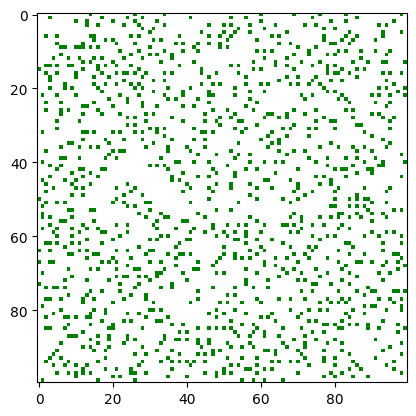

default_chances: [0.  0.5 0.1 0.  0.  0.  0.  0.  0. ], D: -1.9109170665440485 Greenspace 0.506 S_urban_cluster 73


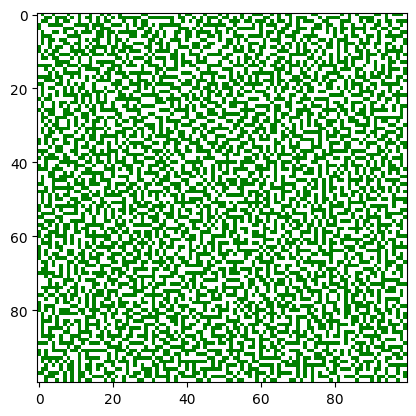

default_chances: [0.  0.5 0.1 0.  0.1 0.  0.  0.  0. ], D: -1.9443426649937805 Greenspace 0.3594 S_urban_cluster 6287


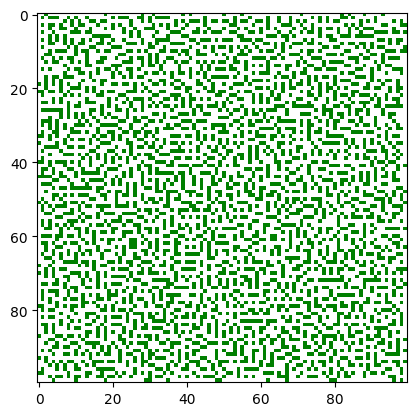

default_chances: [0.  0.5 0.1 0.  1.  0.  0.  0.  0. ], D: -1.9672524576071322 Greenspace 0.2303 S_urban_cluster 7689


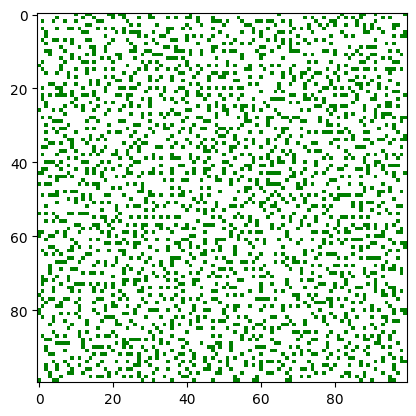

default_chances: [0.  0.5 0.1 0.1 0.  0.  0.  0.  0. ], D: -1.9286191176198375 Greenspace 0.4345 S_urban_cluster 397


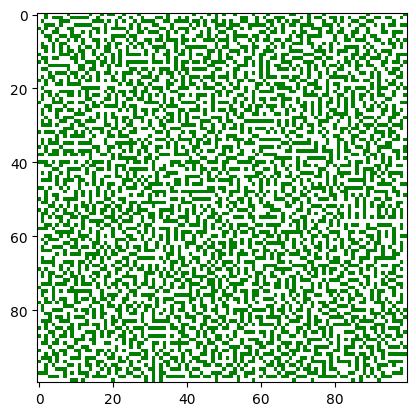

default_chances: [0.  0.5 0.1 0.1 0.1 0.  0.  0.  0. ], D: -1.945294966231908 Greenspace 0.3545 S_urban_cluster 6326


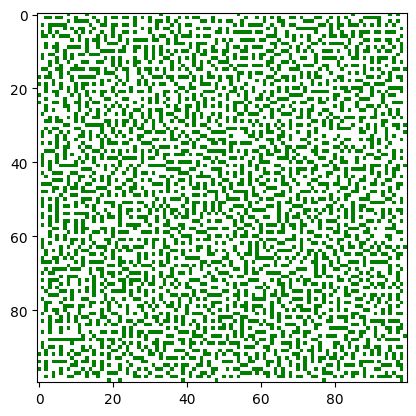

default_chances: [0.  0.5 0.1 0.1 1.  0.  0.  0.  0. ], D: -1.9694284500425998 Greenspace 0.217 S_urban_cluster 7823


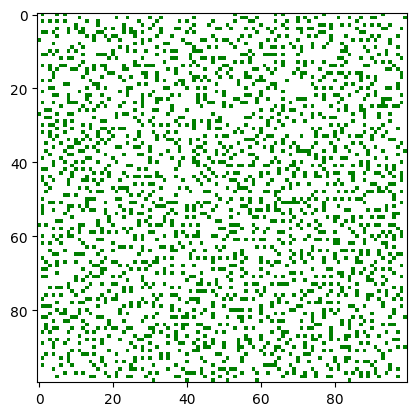

default_chances: [0.  0.5 0.1 1.  0.  0.  0.  0.  0. ], D: -1.9613333071533205 Greenspace 0.2657 S_urban_cluster 7323


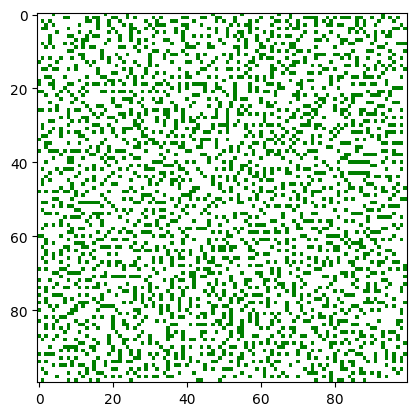

default_chances: [0.  0.5 0.1 1.  0.1 0.  0.  0.  0. ], D: -1.965121714799563 Greenspace 0.2431 S_urban_cluster 7562


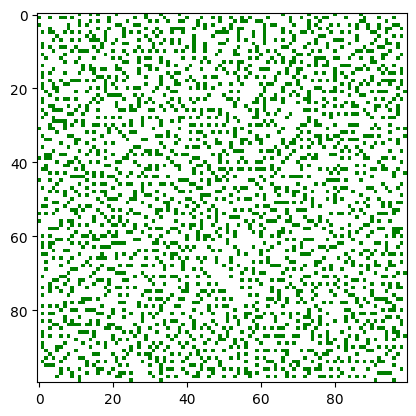

default_chances: [0.  0.5 0.1 1.  1.  0.  0.  0.  0. ], D: -1.9851551039964184 Greenspace 0.112 S_urban_cluster 8880


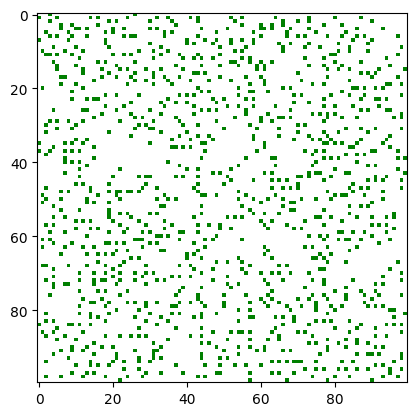

default_chances: [0.  0.5 1.  0.  0.  0.  0.  0.  0. ], D: -1.9516088180088054 Greenspace 0.3201 S_urban_cluster 6755


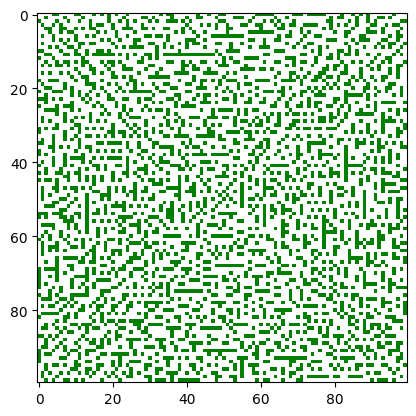

default_chances: [0.  0.5 1.  0.  0.1 0.  0.  0.  0. ], D: -1.9561013757109897 Greenspace 0.2962 S_urban_cluster 7008


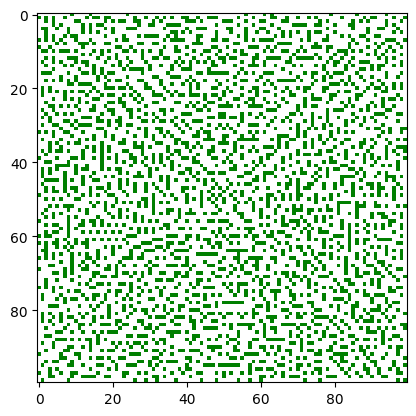

default_chances: [0.  0.5 1.  0.  1.  0.  0.  0.  0. ], D: -1.9746182260352316 Greenspace 0.1838 S_urban_cluster 8154


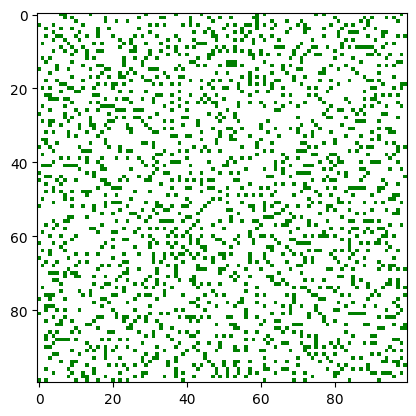

default_chances: [0.  0.5 1.  0.1 0.  0.  0.  0.  0. ], D: -1.955764191797281 Greenspace 0.2979 S_urban_cluster 6981


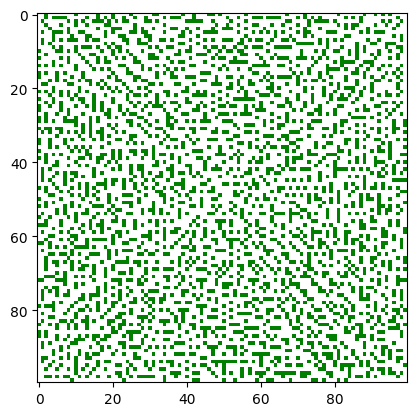

default_chances: [0.  0.5 1.  0.1 0.1 0.  0.  0.  0. ], D: -1.9593958989424713 Greenspace 0.2774 S_urban_cluster 7210


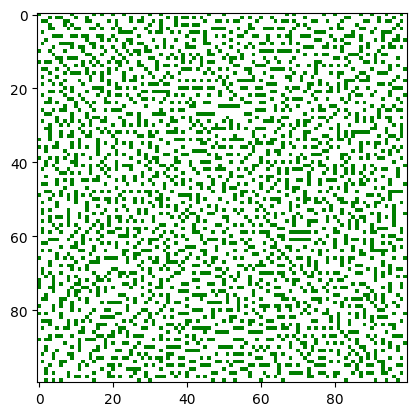

default_chances: [0.  0.5 1.  0.1 1.  0.  0.  0.  0. ], D: -1.9762912678448636 Greenspace 0.1728 S_urban_cluster 8267


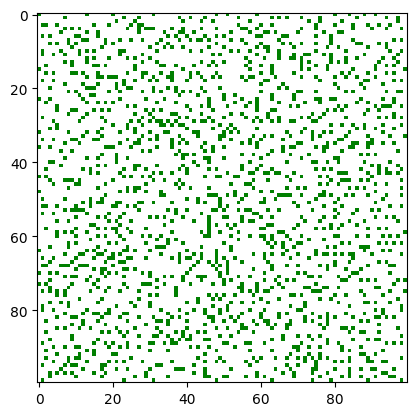

default_chances: [0.  0.5 1.  1.  0.  0.  0.  0.  0. ], D: -1.991840990793806 Greenspace 0.0632 S_urban_cluster 9368


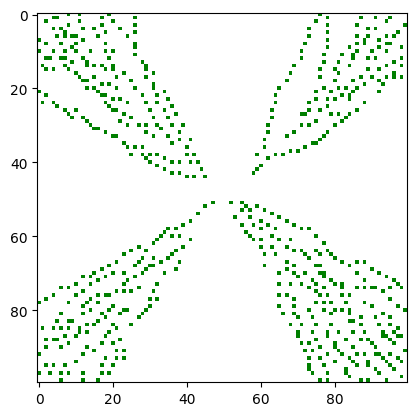

default_chances: [0.  0.5 1.  1.  0.1 0.  0.  0.  0. ], D: -1.9918543306408332 Greenspace 0.0631 S_urban_cluster 9369


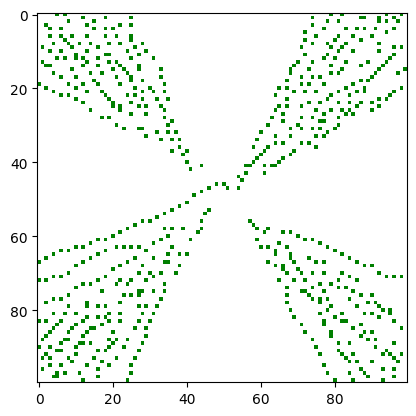

default_chances: [0.  0.5 1.  1.  1.  0.  0.  0.  0. ], D: -1.998781831021849 Greenspace 0.0097 S_urban_cluster 9903


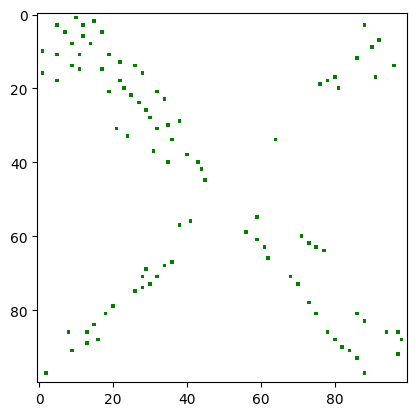

,default_chances,D,Greenspace,S_urban_cluster,S_green,entropy,chi2_statistic,p_value,world
0,[0. 1. 0. 0. 0. 0. 0. 0. 0.],-1.891236,0.5486,544,869,0.688416,94.4784,2.477815e-22,"[[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
1,[0. 1. 0. 0. 0.1 0. 0. 0. 0. ],-1.932847,0.4062,5700,105,0.675446,351.9376,1.603995e-78,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0,..."
2,[0. 1. 0. 0. 1. 0. 0. 0. 0.],-1.957077,0.2710,7281,84,0.584251,2097.6400,0.000000e+00,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0,..."
3,[0. 1. 0. 0.1 0. 0. 0. 0. 0. ],-1.929473,0.4311,5305,74,0.683622,189.8884,3.362722e-43,"[[1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0,..."
4,[0. 1. 0. 0.1 0.1 0. 0. 0. 0. ],-1.946566,0.3479,6501,14,0.646137,925.3764,2.988001e-203,"[[1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0,..."
5,[0. 1. 0. 0.1 1. 0. 0. 0. 0. ],-1.968046,0.2254,7737,7,0.533658,3016.2064,0.000000e+00,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
6,[0. 1. 0. 1. 0. 0. 0. 0. 0.],-1.940562,0.3642,3703,188,0.655797,737.6656,1.929184e-162,"[[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,..."
7,[0. 1. 0. 1. 0.1 0. 0. 0. 0. ],-1.959482,0.2767,7220,12,0.589810,1994.5156,0.000000e+00,"[[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0,..."
8,[0. 1. 0. 1. 1. 0. 0. 0. 0.],-1.977972,0.1616,8384,4,0.442314,4580.5824,0.000000e+00,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
9,[0. 1. 0.1 0. 0. 0. 0. 0. 0. ],-1.927060,0.4401,564,66,0.685954,143.5204,4.523237e-33,"[[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0,..."


In [21]:
from IPython.display import display
import numpy as np
import pandas as pd


df = pd.DataFrame(res, columns=[
    "default_chances", "D", "Greenspace", "S_urban_cluster", 
    "S_green", "entropy", "chi2_statistic", "p_value", "world"
])

df.to_csv("0-5 neighbors centralized growth.csv")

for row in df.itertuples():
    print(f"default_chances: {row.default_chances}, D: {row.D} Greenspace {row.Greenspace} S_urban_cluster {row.S_urban_cluster}")
    display_world(row.world)
df



## r = 2

In [26]:
from IPython.display import display
import numpy as np
import pandas as pd


df = pd.DataFrame(res, columns=[
    "default_chances", "D", "Greenspace", "S_urban_cluster", 
    "S_green_cluster", "entropy", "chi2_statistic", "p_value", "world"
])

# df.to_csv("0-5 neighbors centralized growth r=2.csv")

# for row in df.itertuples():
#     print(f"default_chances: {row.default_chances}, D: {row.D} Greenspace {row.Greenspace} S_urban_cluster {row.S_urban_cluster}")
#     display_world(row.world)
df



,default_chances,D,Greenspace,S_urban_cluster,S_green_cluster,entropy,chi2_statistic,p_value,world
0,[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.],0.0,0.9999,1,9999,0.001021,9996.0004,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,[0. 0. 0. 0. 0. 0. 0. 0.1 0. 0. 0. 0...,0.0,0.9999,1,9999,0.001021,9996.0004,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.],0.0,0.9999,1,9999,0.001021,9996.0004,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,[0. 0. 0. 0. 0. 0. 0.1 0. 0. 0. 0. 0...,0.0,0.9999,1,9999,0.001021,9996.0004,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,[0. 0. 0. 0. 0. 0. 0.1 0.1 0. 0. 0. 0...,0.0,0.9999,1,9999,0.001021,9996.0004,0.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
...,...,...,...,...,...,...,...,...,...
6502,[1. 1. 1. 1. 0. 1. 0.1 0.1 0. 0. 0. 0...,-2.0,0.0000,10000,0,0.000000,10000.0000,0.0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
6503,[1. 1. 1. 1. 0. 1. 0.1 1. 0. 0. 0. 0...,-2.0,0.0000,10000,0,0.000000,10000.0000,0.0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
6504,[1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.],-2.0,0.0000,10000,0,0.000000,10000.0000,0.0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."
6505,[1. 1. 1. 1. 0. 1. 1. 0.1 0. 0. 0. 0...,-2.0,0.0000,10000,0,0.000000,10000.0000,0.0,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,..."


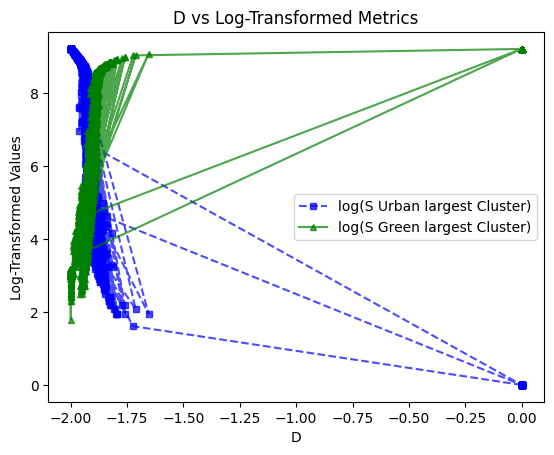

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the plot
fig, ax = plt.subplots()

# Plot D vs log-transformed S Urban Cluster and S Green Cluster
ax.plot(df["D"], np.log(df["S_urban_cluster"]), 
        marker='s', markersize=4, linestyle='--', color='blue', 
        label='log(S Urban largest Cluster)', alpha=0.7)

ax.plot(df["D"], np.log(df["S_green_cluster"]), 
        marker='^', markersize=4, linestyle='-', color='green', 
        label='log(S Green largest Cluster)', alpha=0.7)

# Add labels and title
ax.set_xlabel("D")
ax.set_ylabel("Log-Transformed Values")
ax.set_title("D vs Log-Transformed Metrics")

# Add legend
ax.legend()

# Display the plot
plt.show()


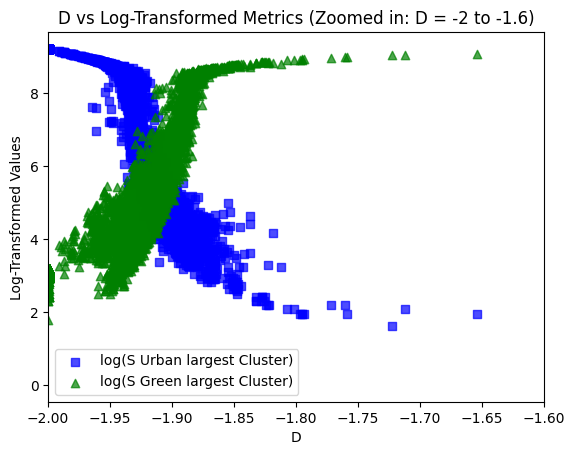

In [42]:
# Scatter plot with zoomed-in x-axis range between -2 and -1
fig, ax = plt.subplots()

# Scatter plot for D vs log-transformed metrics
ax.scatter(df["D"], np.log(df["S_urban_cluster"]), 
           marker='s', color='blue', label='log(S Urban largest Cluster)', alpha=0.7)

ax.scatter(df["D"], np.log(df["S_green_cluster"]), 
           marker='^', color='green', label='log(S Green largest Cluster)', alpha=0.7)

# Set the x-axis limit to zoom in on the range [-2, -1]
ax.set_xlim([-2, -1.6])

# Add labels and title
ax.set_xlabel("D")
ax.set_ylabel("Log-Transformed Values")
ax.set_title("D vs Log-Transformed Metrics (Zoomed in: D = -2 to -1.6)")

# Add a legend
ax.legend()

# Display the plot
plt.show()


## Statistics

In [8]:
import numpy as np
from scipy.stats import entropy

def calculate_entropy(ca_grid):
    unique, counts = np.unique(ca_grid, return_counts=True)
    return entropy(counts)

import numpy as np
from scipy.stats import chisquare

def test_uniformity_chi_square(ca_grid):
  """Tests the uniformity of a CA grid using the chi-square test.

  Args:
    ca_grid: A 2D numpy array representing the CA grid.

  Returns:
    The chi-square statistic and p-value.
  """

  # Flatten the grid and count the occurrences of each state
  observed_frequencies = np.bincount(ca_grid.flatten().astype(int))

  # Calculate the expected frequency for each state under a uniform distribution
  expected_frequencies = np.ones_like(observed_frequencies) * len(ca_grid.flatten()) / len(observed_frequencies)

  # Perform the chi-square test
  chi2_statistic, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

  return chi2_statistic, p_value

# Example usage
ca_grid = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])
chi2_statistic, p_value = test_uniformity_chi_square(ca_grid)

print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

Chi-square statistic: 0.1111111111111111
P-value: 0.7388826803635273


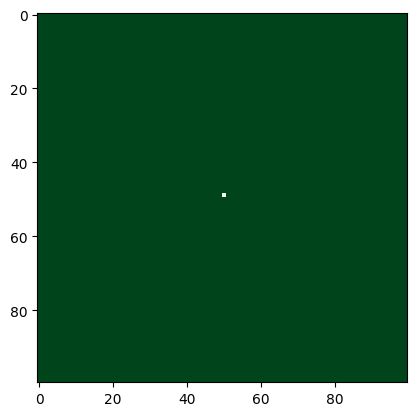

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [39]:
from scipy.ndimage import label

def largest_cluster_size(world, zero_or_one = 0):
    # Using scipy's label function to identify contiguous clusters of 0's (greenspace)
    labeled_world, num_features = label(world == zero_or_one)

    if num_features == 0:
        return  # If no clusters, exit function

    # Find the size of each cluster
    sizes = np.bincount(labeled_world.ravel())

    # Find the label corresponding to the largest cluster
    largest_cluster_label = np.argmax(sizes[1:]) + 1

    # Create an array where only the largest cluster is marked
    largest_cluster = (labeled_world == largest_cluster_label).astype(int)

    # Plot the largest cluster of 0's (greenspace)
    plt.figure()
    plt.imshow(np.flipud(largest_cluster), cmap=plt.get_cmap('Greens'))
    plt.show()
    return largest_cluster

largest_cluster_size(world)



# Greenspace metrics

In [6]:
from scipy.ndimage import label

# 1. Metric: share_greenspace (% of greenspace cells)
def share_greenspace(world):
    total_cells = size * size
    greenspace_cells = np.sum(world == 0)
    return greenspace_cells / total_cells

def largest_cluster(world, zero_or_one = 0):
     # Using scipy's label function to identify contiguous clusters of 0's (greenspace)
    labeled_world, num_features = label(world == zero_or_one)
    if num_features == 0:
        return 0
    # Find the size of each cluster and return the largest
    sizes = np.bincount(labeled_world.ravel())
    return sizes[1:].max()  # exclude the background (index 0)

# 2. Metric: biggest_greenspace (largest cluster of contiguous greenspace cells)
def biggest_greenspace(world):
    return largest_cluster()


# 4. Metric: average_building (average size of building clusters)
def average_building(world):
    labeled_world, num_features = label(world == 1)
    if num_features == 0:
        return 0
    # Find the size of each cluster
    sizes = np.bincount(labeled_world.ravel())
    return sizes[1:].mean()  # exclude the background (index 0)


# 3. Metric: access_greenspace (urban cells bordering greenspace)
def access_greenspace(world):
    access_count = 0
    total_urban_cells = np.sum(world == 1)  # count the number of urban cells
    for i in range(size):
        for j in range(size):
            if world[i][j] == 1:  # only look at urban cells
                # Get von Neumann neighborhood (up, down, left, right)
                neighbors = [
                    (i-1, j),  # up
                    (i+1, j),  # down
                    (i, j-1),  # left
                    (i, j+1)   # right
                ]
                for ni, nj in neighbors:
                    if 0 <= ni < size and 0 <= nj < size and world[ni][nj] == 0:
                        access_count += 1
                        break  # no need to check further if greenspace is found

    if total_urban_cells == 0:
        return 0  # avoid division by zero if there are no urban cells

    return access_count / total_urban_cells  # return percentage

# 4. Metric: average_greenspace (average size of greenspace clusters)
def average_greenspace(world):
    labeled_world, num_features = label(world == 0)
    if num_features == 0:
        return 0
    # Find the size of each cluster
    sizes = np.bincount(labeled_world.ravel())
    return sizes[1:].mean()  # exclude the background (index 0)

# Compute and display the metrics
final_share_greenspace = share_greenspace(world)
final_biggest_greenspace = biggest_greenspace(world)
final_access_greenspace = access_greenspace(world)
final_average_greenspace = average_greenspace(world)

print(f"Share of Greenspace: {final_share_greenspace:.2%}")
print(f"Largest Greenspace Cluster: {final_biggest_greenspace} cells")
print(f"Percentage of Urban Cells with Greenspace Access: {final_access_greenspace:.2%}")
print(f"Average Greenspace Cluster Size: {final_average_greenspace:.2f} cells")

NameError: name 'world' is not defined

# Loop runs and collect metrics

In [47]:
# Number of simulation runs
num_runs = 100  # Change this to the desired number of runs

# Initialize lists to store metrics for each run
share_greenspace_list = []
biggest_greenspace_list = []
access_greenspace_list = []
average_greenspace_list = []

# Run the simulation multiple times
for run in range(num_runs):
    # Reset world for each run
    world = np.zeros((size, size))
    world[size // 2, size // 2] = 1  # starting condition with one urban cell in the center

    finished = False
    reached_edge = False

    # Main update loop for the simulation
    while not finished:
        (next_world, touched_edge) = update_world(world)

        if touched_edge:
            reached_edge = True
        if reached_edge and np.array_equal(world, next_world):
            finished = True
        world = next_world

    # Compute metrics for the final state of the world
    final_share_greenspace = share_greenspace(world)
    final_biggest_greenspace = biggest_greenspace(world)
    final_access_greenspace = access_greenspace(world)  
    final_average_greenspace = average_greenspace(world)

    # Append metrics to their respective lists
    share_greenspace_list.append(final_share_greenspace)
    biggest_greenspace_list.append(final_biggest_greenspace)
    access_greenspace_list.append(final_access_greenspace)
    average_greenspace_list.append(final_average_greenspace)

# Calculate averages of the metrics
average_share_greenspace = np.mean(share_greenspace_list)
average_biggest_greenspace = np.mean(biggest_greenspace_list)
average_access_greenspace = np.mean(access_greenspace_list)
average_average_greenspace = np.mean(average_greenspace_list)

# Print the average metrics across all runs
print(f"Average Share of Greenspace: {average_share_greenspace:.2%}")
print(f"Average Largest Greenspace Cluster: {average_biggest_greenspace:.2f} cells")
print(f"Average Percentage of Urban Cells with Greenspace Access: {average_access_greenspace:.2%}")
print(f"Average Greenspace Cluster Size: {average_average_greenspace:.2f} cells")

Average Share of Greenspace: 42.73%
Average Largest Greenspace Cluster: 47.83 cells
Average Percentage of Urban Cells with Greenspace Access: 88.81%
Average Greenspace Cluster Size: 4.57 cells


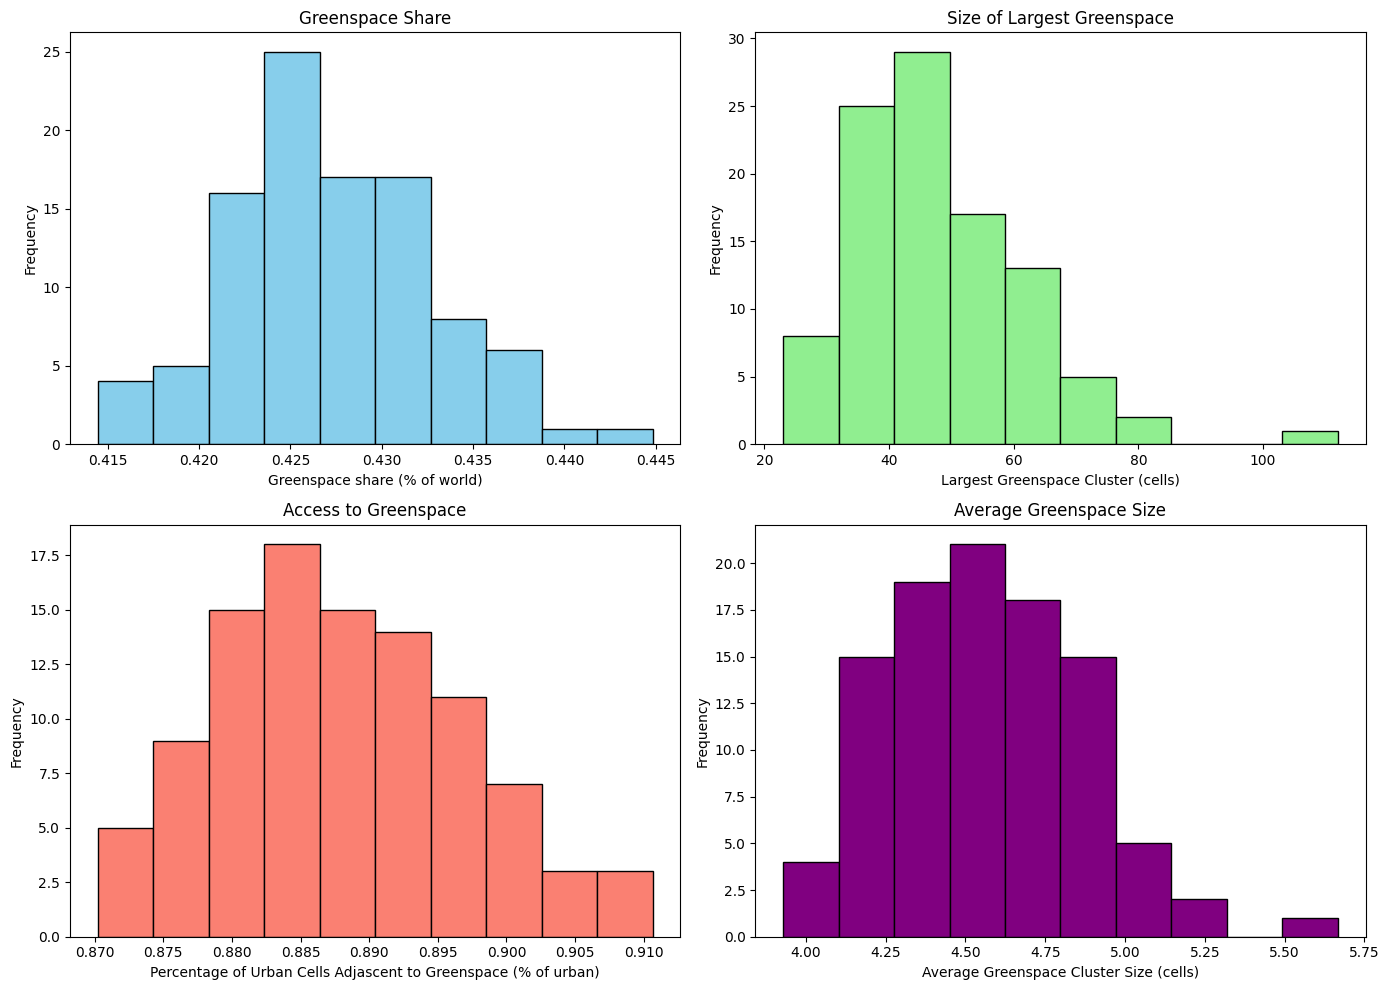

In [48]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import patches
import random

# Share of Greenspace
plt.subplot(2, 2, 1)
plt.hist(share_greenspace_list, bins=10, color='skyblue', edgecolor='black')
plt.title('Greenspace Share')
plt.xlabel('Greenspace share (% of world)')
plt.ylabel('Frequency')

# Parameters
N, S, K, steps = 32, 2, 3, 32 #size, states, neighbors, steps
rule = 30 #rule number
tape = np.zeros(N) #initial conditions of zero
tape[N//2] = 1 #initial conditions
#tape = np.random.randint(2, size=N) #random initial conditions

# Run the CA
#tapes = run_1d_CA(steps,tape)
#tapes = run_rule_30(steps,tape)
tapes = run_cellauto(S, K, decode_rule(rule, S, K), steps, tape) #run model

# Average Greenspace Cluster Size
plt.subplot(2, 2, 4)
plt.hist(average_greenspace_list, bins=10, color='purple', edgecolor='black')
plt.title('Average Greenspace Size')
plt.xlabel('Average Greenspace Cluster Size (cells)')
plt.ylabel('Frequency')

# Add rule label
#ax.text(2, steps+0.5, f'Cellular automaton', color='Orange', fontsize=20)
ax.text(2, steps+0.5, f'Rule {rule}', color='Orange', fontsize=20)
plt.show()

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def generate_moore_neighborhoods():
    # Initialize a 3x3 grid with all zeros
    base_grid = np.zeros((3, 3), dtype=int)
    base_grid[1,1]=1
    # List to store all configurations
    configurations = []

    # Iterate through all positions in the 3x3 grid
    for i in range(3):
        for j in range(3):
            if (i, j) != (1, 1):  # Skip the center cell (1, 1)
                # Create a new grid for each configuration
                grid = base_grid.copy()
                grid[i, j] = 1  # Set one neighbor to 1
                configurations.append(grid)

    return configurations

def display_configurations(configurations):
    # Create a plot for each configuration
    for idx, config in enumerate(configurations):
        plt.figure()
        plt.imshow(config, cmap='gray', vmin=0, vmax=1)
        plt.title(f'Configuration {idx + 1}')
        plt.axis('off')  # Hide the axes for a cleaner look
        plt.show()

# Generate and display all configurations
configs = generate_moore_neighborhoods()

for c in configs:
    print(c)

[1,0,0,0,0,0,0,0,0]
[0,1,0,0,0,0,0,0,0]

[[1 0 0]
 [0 1 0]
 [0 0 0]]
[[0 1 0]
 [0 1 0]
 [0 0 0]]
[[0 0 1]
 [0 1 0]
 [0 0 0]]
[[0 0 0]
 [1 1 0]
 [0 0 0]]
[[0 0 0]
 [0 1 1]
 [0 0 0]]
[[0 0 0]
 [0 1 0]
 [1 0 0]]
[[0 0 0]
 [0 1 0]
 [0 1 0]]
[[0 0 0]
 [0 1 0]
 [0 0 1]]


[1, 0, 0, 0, 0, 0, 0, 0, 0]

In [64]:
from itertools import permutations

def generate_permutations_with_k_ones(k):
    # Create the initial array with k ones and (9 - k) zeros
    base_array = [1] * k + [0] * (9 - k)
    
    # Generate all unique permutations of the array
    unique_permutations = set(permutations(base_array))
    print(f"unique_permutations {len(unique_permutations)}")
    # Print each permutation
    for perm in unique_permutations:
        print(list(perm))
        
    return unique_permutations

# Loop through different values of k (from 1 to 9)
for k in range(1, 10):
    print(f"Permutations with {k} ones:")
    generate_permutations_with_k_ones(k)
    print()  # Add a new line after each set of permutations


Permutations with 1 ones:
unique_permutations 9
[0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0]

Permutations with 2 ones:
unique_permutations 36
[0, 1, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1, 0, 1, 0]
[1, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 1, 0, 1, 0, 0, 0, 0]
[1, 0, 1, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 1, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 1]
[1, 0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 1, 1, 0]
[0, 0, 1, 0, 0, 1, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 0, 0]
[1, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 1]
[1, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 0, 0, 1, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 1]
[0, 0, 0, 1, 0, 0, 0, 1, 0]
[1, 0,

In [7]:
from itertools import permutations
import numpy as np

def generate_3x3_permutations_with_k_ones(k):
    # Create the base 1D array with k ones and (9 - k) zeros
    base_array = [1] * k + [0] * (9 - k)
    
    # Generate all unique permutations of the array
    unique_permutations = set(permutations(base_array))  

    # Print each permutation as a 3x3 matrix
    m3x3 = list()
    for perm in unique_permutations:
        matrix = np.array(perm).reshape(3, 3)
        if matrix[1,1] == 1:
            m3x3.append(matrix)
            print(matrix)
            print()  # Add space between matrices

    return (unique_permutations, m3x3)

# Loop through different values of k (from 1 to 9)
Space_of_k_string_permutations = 0
Space = 0
lshist = []
for k in range(1, 10):
    print(f"Permutations with {k} ones, {k-1} neighbors:")
    (unique_permutations, m3x3) = generate_3x3_permutations_with_k_ones(k)
    # Space_of_k_string_permutations += len(unique_permutations)
    count_situations = len(m3x3)
    Space += count_situations 
    lshist.append((k-1, count_situations))
    # print(f"unique_permutations {len(unique_permutations)}")
    print(f"neighbor situations {count_situations}")
    print()  # Add a new line after each set of permutations

print(f"Space of all neighbor permutations {Space}")
print(lshist)


Permutations with 1 ones, 0 neighbors:
[[0 0 0]
 [0 1 0]
 [0 0 0]]

neighbor situations 1

Permutations with 2 ones, 1 neighbors:
[[1 0 0]
 [0 1 0]
 [0 0 0]]

[[0 0 1]
 [0 1 0]
 [0 0 0]]

[[0 0 0]
 [0 1 1]
 [0 0 0]]

[[0 0 0]
 [0 1 0]
 [0 1 0]]

[[0 0 0]
 [0 1 0]
 [1 0 0]]

[[0 0 0]
 [0 1 0]
 [0 0 1]]

[[0 0 0]
 [1 1 0]
 [0 0 0]]

[[0 1 0]
 [0 1 0]
 [0 0 0]]

neighbor situations 8

Permutations with 3 ones, 2 neighbors:
[[0 1 0]
 [0 1 0]
 [0 1 0]]

[[1 0 0]
 [1 1 0]
 [0 0 0]]

[[0 1 0]
 [0 1 0]
 [0 0 1]]

[[1 0 1]
 [0 1 0]
 [0 0 0]]

[[1 0 0]
 [0 1 0]
 [0 0 1]]

[[0 0 0]
 [0 1 0]
 [0 1 1]]

[[1 0 0]
 [0 1 0]
 [1 0 0]]

[[0 1 0]
 [0 1 1]
 [0 0 0]]

[[1 0 0]
 [0 1 0]
 [0 1 0]]

[[0 0 1]
 [1 1 0]
 [0 0 0]]

[[0 1 0]
 [0 1 0]
 [1 0 0]]

[[0 0 0]
 [0 1 1]
 [1 0 0]]

[[0 1 0]
 [1 1 0]
 [0 0 0]]

[[0 1 1]
 [0 1 0]
 [0 0 0]]

[[0 0 0]
 [0 1 0]
 [1 0 1]]

[[1 1 0]
 [0 1 0]
 [0 0 0]]

[[0 0 0]
 [1 1 1]
 [0 0 0]]

[[0 0 1]
 [0 1 0]
 [0 1 0]]

[[0 0 0]
 [1 1 0]
 [1 0 0]]

[[0 0 0]
 [0 1 0]
 [1 1 0

[(0, 0.00390625), (1, 0.03125), (2, 0.109375), (3, 0.21875), (4, 0.2734375), (5, 0.21875), (6, 0.109375), (7, 0.03125), (8, 0.00390625)]


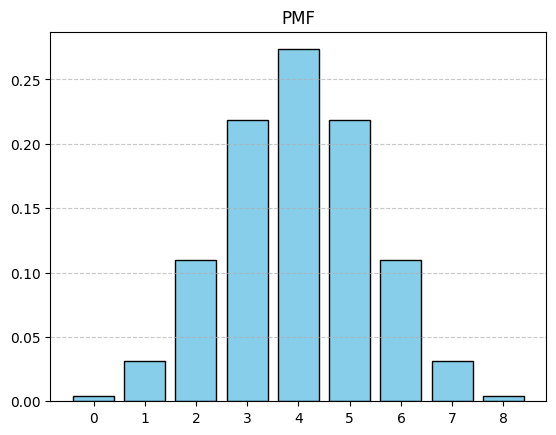

In [11]:
import matplotlib.pyplot as plt
print([(k, freq/Space) for (k, freq) in lshist])
k_values = [x for (x, freq) in lshist]
frequencies = [freq for (x, freq) in lshist]

# # Plot the histogram
# plt.bar(k_values, frequencies, width=0.8, align='center', color='skyblue', edgecolor='black')
# plt.xlabel('k')
# plt.ylabel('Frequency')
# plt.title('Histogram of k neighbors')
# plt.xticks(k_values)  # Ensure all x-values are shown on the x-axis
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Display the histogram
# plt.show()

k_values = [x for (x, freq) in lshist]
frequencies = [freq/Space for (x, freq) in lshist]

# Plot the histogram
plt.figure()
plt.bar(k_values, frequencies, width=0.8, align='center', color='skyblue', edgecolor='black')
plt.title('PMF')
plt.xticks(k_values)  # Ensure all x-values are shown on the x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the histogram
plt.show()
